In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv')

In [ ]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [ ]:
pip install scikit-learn

In [ ]:
X=data[['PM25']] #variable_indepen
y=data[['SO2']] #variable_depen

In [ ]:
split_index=int(len(data)*0.8)

In [ ]:
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]

y_test=y.iloc[split_index:]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
coeficientes= pd.DataFrame({
    'Variable':X.columns,
    'Coeficientes':model.coef_[0]
})

In [ ]:
print(coeficientes)

  Variable  Coeficientes
0     PM25      0.198378


In [ ]:
print(f"Intercepto:{model.intercept_}")

Intercepto:[-0.37031354]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2=r2_score(y_test, y_pred)

In [ ]:
r2

-0.3649887328595345

In [ ]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
rmse

2.0384915179390877

In [ ]:
mae=mean_absolute_error(y_test, y_pred)

In [ ]:
mae

1.598076626451827

In [ ]:
y_pred

array([[ 2.49941896],
       [ 3.56694865],
       [ 3.26973716],
       [ 1.76729808],
       [ 2.61811797],
       [ 3.93677406],
       [ 3.52831999],
       [ 1.98021868],
       [ 3.33693751],
       [ 2.008475  ],
       [ 1.24680346],
       [ 0.97458948],
       [ 1.75743966],
       [ 2.64544042],
       [ 2.15280432],
       [ 3.49341347],
       [ 1.30593917],
       [ 2.78896554],
       [ 2.25535856],
       [ 2.29726212],
       [ 3.24683712],
       [ 2.90001262],
       [ 1.83663967],
       [ 0.76127823],
       [ 2.19599213],
       [ 2.62643135],
       [ 5.01844801],
       [ 1.66274717],
       [ 1.35544791],
       [ 3.7820508 ],
       [ 1.70718104],
       [ 2.20632658],
       [ 2.10483122],
       [ 1.6855419 ],
       [ 3.977991  ],
       [ 5.31414252],
       [ 4.00743866],
       [ 3.53333958],
       [ 3.48715401],
       [ 2.50350003],
       [ 3.10604815],
       [ 3.65659994],
       [ 3.61028682],
       [ 2.81527151],
       [ 2.43044595],
       [ 3

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
residuos=y_test-y_pred

Text(0.5, 1.0, 'Distribución de residuos')

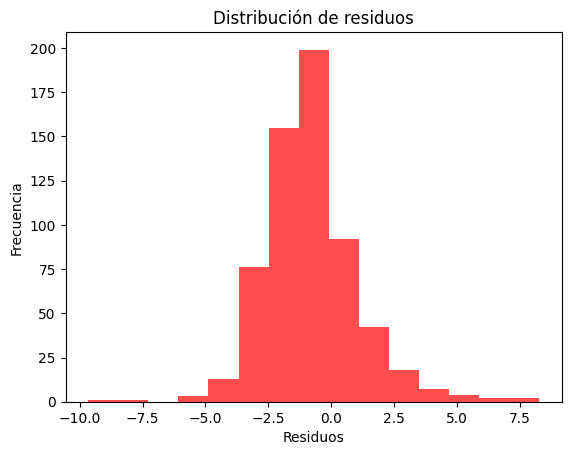

In [ ]:
plt.hist(residuos, bins=15,color='red',alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos')

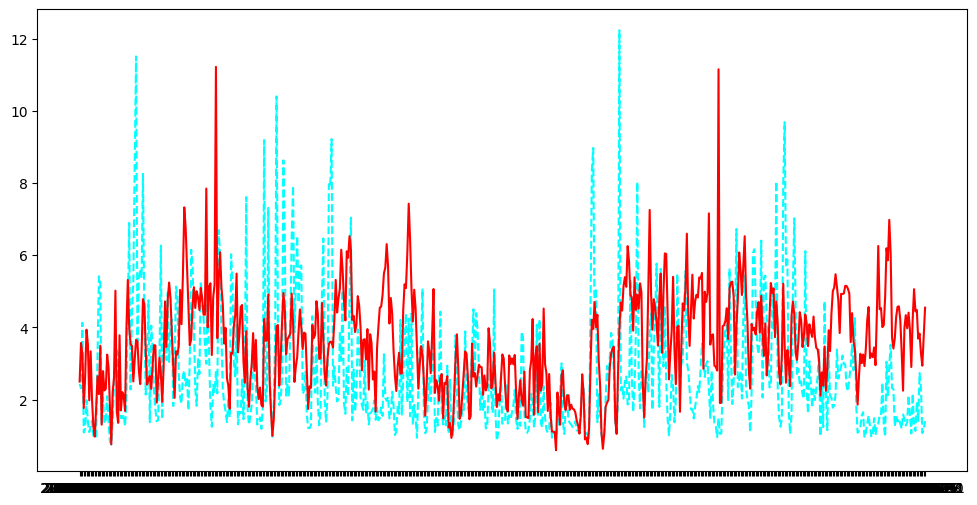

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test, linestyle='--', color='aqua')
plt.plot(data.iloc[split_index:]['fecha'],y_pred, linestyle='-', color='red')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=data.sort_values(by='fecha')
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred=rf_model.predict(X_test)

In [ ]:
y_pred

array([ 2.04966285,  3.85593071,  4.4938321 ,  2.35569007,  2.27784741,
        4.3747894 ,  3.61413812,  1.30033621,  2.64134994,  2.01182844,
        0.95182457,  1.04387272,  1.67286953,  2.4296478 ,  1.88522354,
        3.16839944,  1.77360564,  2.35665176,  2.27605746,  2.26558587,
        2.86642594,  2.1051897 ,  1.51113037,  0.8604753 ,  3.11093721,
        2.26402958,  9.62411991,  1.41776003,  1.28369557,  3.50276953,
        1.6521645 ,  2.04121312,  2.0586945 ,  1.3276499 ,  4.04571097,
        4.87342236,  4.0043986 ,  3.59835024,  3.22944838,  1.99858624,
        6.16034346,  3.57923219,  3.70844309,  2.08779829,  1.81899716,
        2.52785047,  4.19406209,  4.5522108 ,  4.83607993,  1.92342482,
        2.28443789,  2.44519494,  2.23650289,  2.57654966,  4.01665743,
        3.47155094,  1.92051592,  2.91227492,  4.13772729,  2.23174782,
        3.23517895,  3.49848892,  4.41205908,  5.1685364 ,  4.23482587,
        4.57161739,  4.37053867,  3.59296855,  4.55059894,  2.11

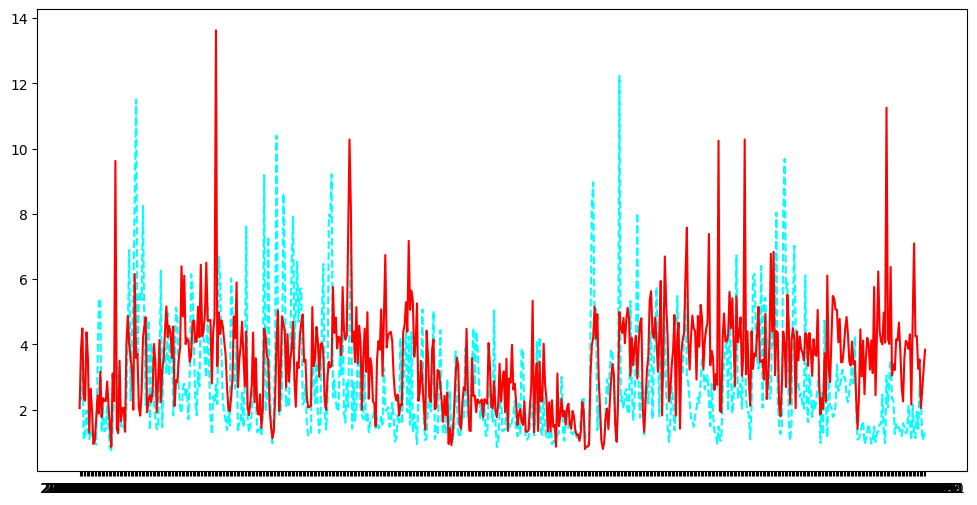

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test, linestyle='--', color='aqua')
plt.plot(data.iloc[split_index:]['fecha'],y_pred, linestyle='-', color='red')
#